<a href="https://colab.research.google.com/github/romelgo/Prediccion-de-la-perdida-de-clientes-mediante-Machine-Learning/blob/main/bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('dataejercicio.csv')

In [56]:
# Mostrar las primeras 5 filas del DataFrame para verificar que se cargó correctamente
print("Primeras 5 filas de los datos:")
df.head()

Primeras 5 filas de los datos:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Informacion general sobre el **dataset**

In [43]:
# Obtener un resumen de la información del DataFrame (tipos de datos, columnas, etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **Objetivo: Predecir la columna *Exited* (1 = cliente abandonó, 0 = cliente permaneció)**

Columnas:


In [44]:
# Analizamos las columnas
dfa = pd.read_csv('/content/table-e50512c5-6d32-4762-af7a-4d3074fffa28-12.csv')

In [45]:
dfa.head(14)

,Nombre,Descripción
0,RowNumber,Índice numérico (no relevante para el modelo)
1,CustomerId,ID único del cliente (no predictivo)
2,Surname,Apellido del cliente (posible para feature eng...
3,CreditScore,Puntuación crediticia
4,Geography,"País (Francia, España, Alemania)"
5,Gender,Género (Male/Female)
6,Age,Edad del cliente
7,Tenure,Años como cliente
8,Balance,Saldo bancario
9,NumOfProducts,Número de productos bancarios contratados


# **Eliminar columnas irrelevantes**

In [46]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# **Codificación de variables categóricas**

In [57]:
# One-hot encoding para Geography (3 categorías)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

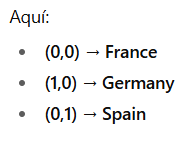

In [58]:
# Label encoding para Gender
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

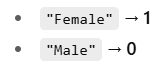

In [61]:
df[['Geography_Germany','Geography_Spain']].head(10)

,Geography_Germany,Geography_Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
5,False,True
6,False,False
7,True,False
8,False,False
9,False,False


In [62]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,True


# **Estadisticas** **Basicas**

In [63]:
# Obtener estadísticas descriptivas básicas de las columnas numéricas
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Estadisticas de todas las columnas

In [64]:
print('Estadisticas completas')
df.describe(include='all')

Estadisticas completas


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7491,7523
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,NaN,NaN
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,NaN,NaN
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,NaN,NaN
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,NaN,NaN
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,NaN,NaN
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,NaN,NaN


# **Veremos si este dataset contiene valores nulos**

In [65]:
print('Mostramos si hay valores nulos')
df.isnull().sum()

Mostramos si hay valores nulos


,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


# **Grafico de barras para saber como esta distribuida cada una de las variables**

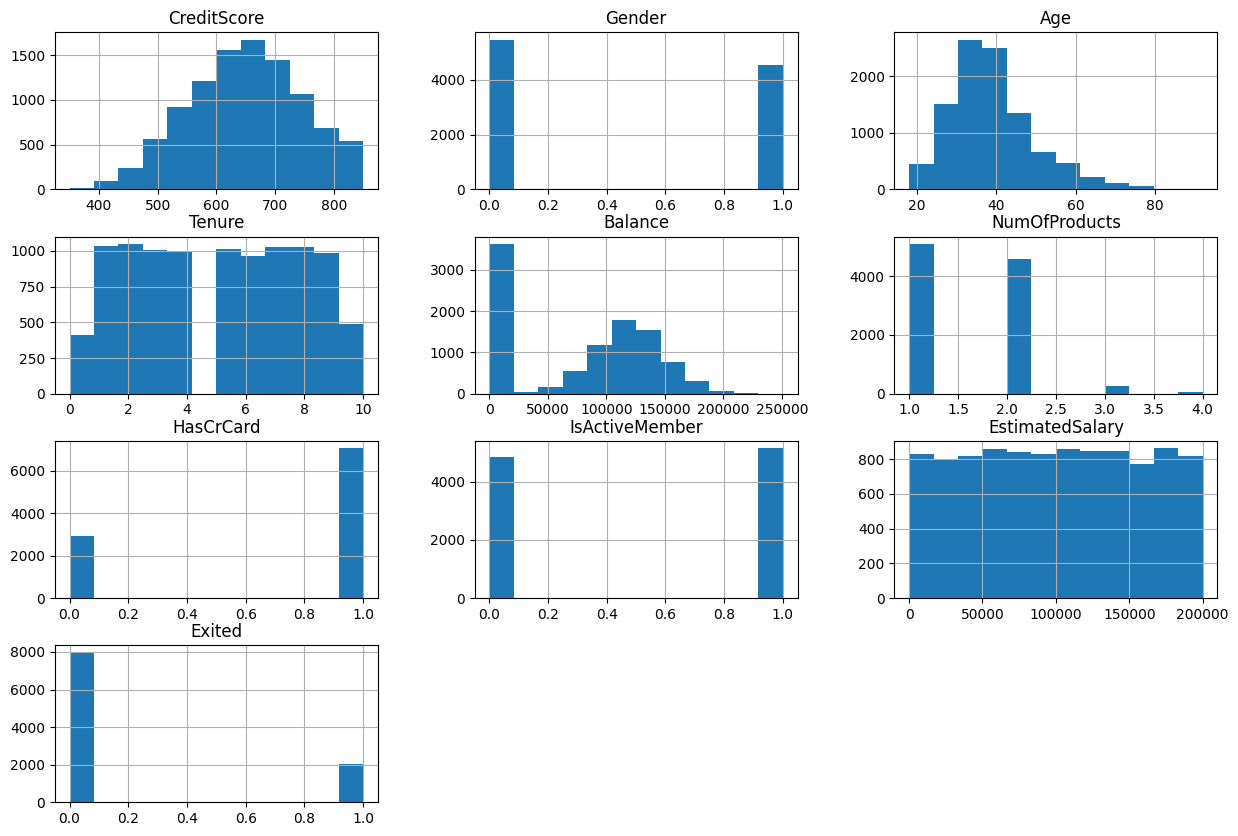

In [66]:
df.hist(bins=12, figsize=(15,10))
plt.show()

# **Verificacion visual de los datos del archivo**

<Figure size 1000x3000 with 0 Axes>

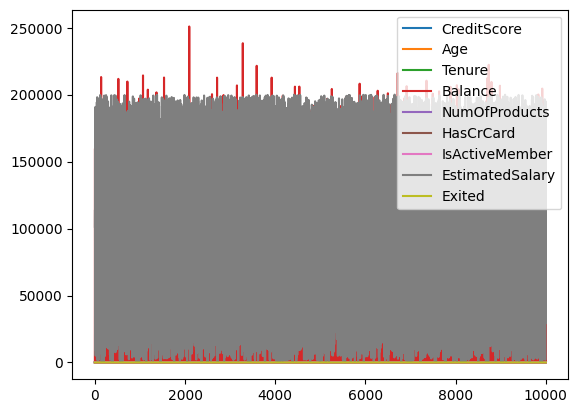

In [51]:
plt.figure(figsize=(10,30))
df.plot()
plt.show()

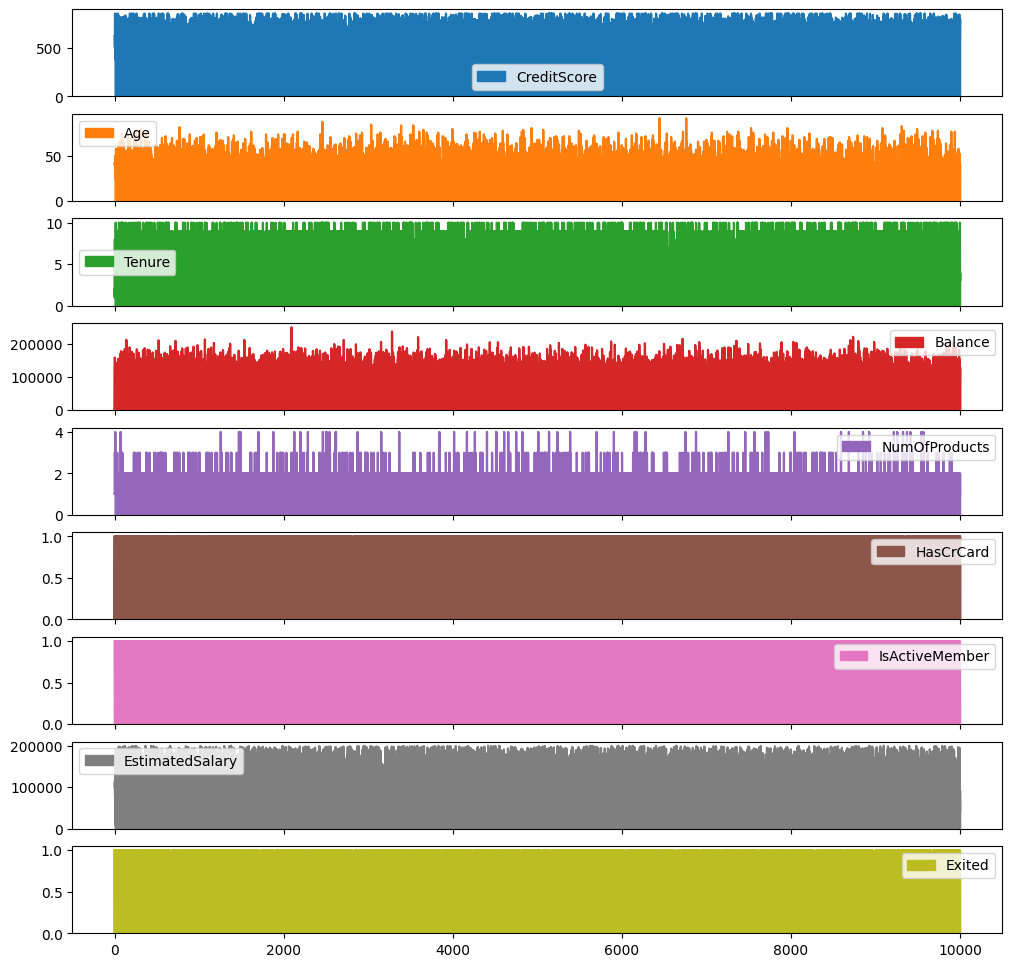

In [52]:
df.plot.area(figsize=(12,12), subplots=True)
plt.show()

# **Distribución de clientes que se fueron o no (Exited)**

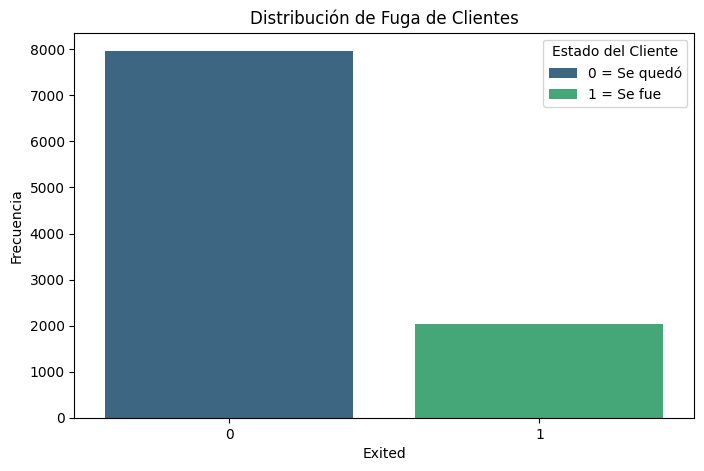

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Exited',hue='Exited', palette='viridis')

# Añadir leyenda manualmente
plt.legend(title="Estado del Cliente", labels=["0 = Se quedó", "1 = Se fue"])
plt.title('Distribución de Fuga de Clientes')
plt.ylabel('Frecuencia')
plt.show()

# **Distribución de género (Gender)**

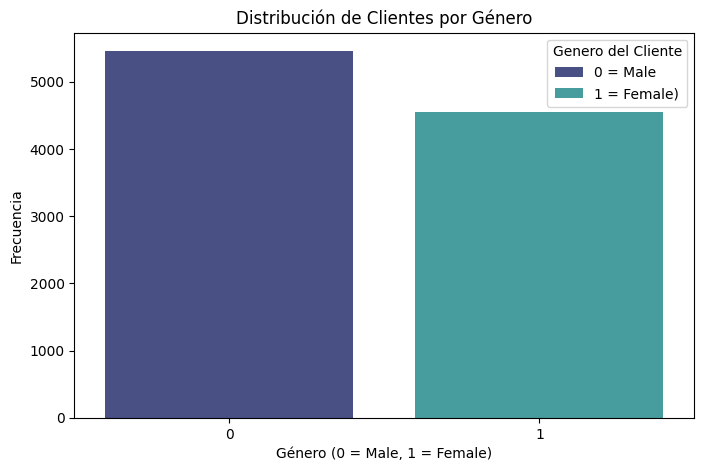

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='Gender', palette='mako',legend=True)
plt.title('Distribución de Clientes por Género')
# Cambiar etiquetas de la leyenda
plt.legend(title="Genero del Cliente", labels=["0 = Male", "1 = Female)"])
plt.xlabel('Género (0 = Male, 1 = Female)')
plt.ylabel('Frecuencia')
plt.show()


## **Distribución de países (Geography)**

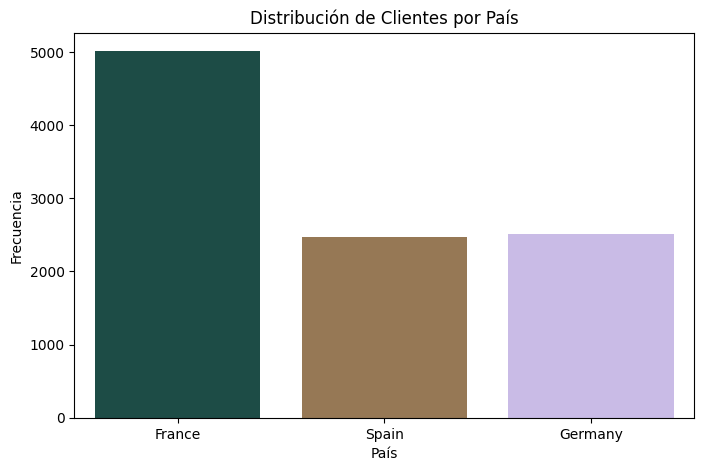

In [75]:
df['Geography'] = df.apply(
    lambda row: 'Germany' if row['Geography_Germany'] else
                ('Spain' if row['Geography_Spain'] else 'France'),
    axis=1
)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Geography', hue='Geography', palette='cubehelix')
plt.title('Distribución de Clientes por País')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.show()


# **Veremos como cambian las variables segun | Edad vs Exited(Salida)**


# > Nos permite ver si los clientes que abandonan son más jóvenes o más mayores.



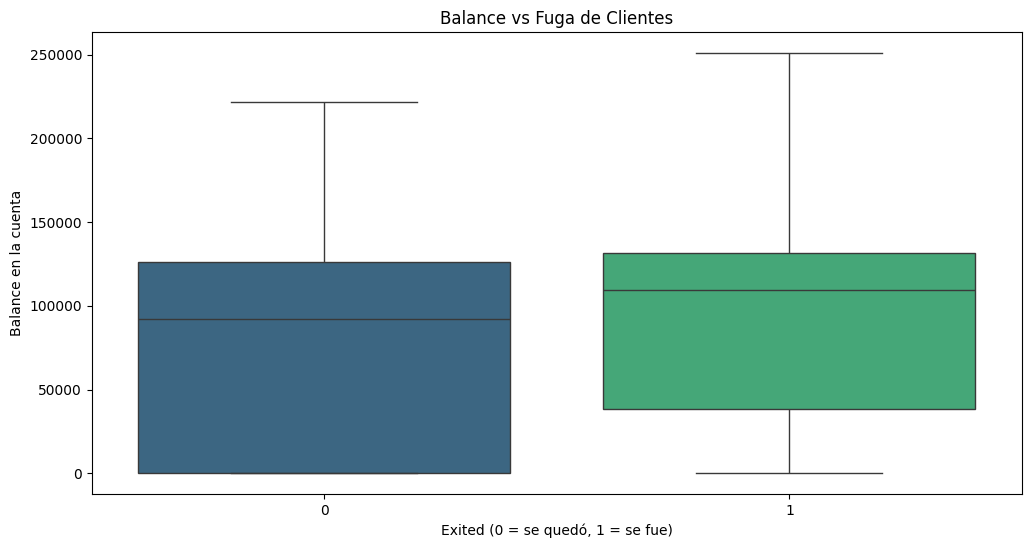

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Exited', hue='Exited', y='Balance', palette='viridis',legend=False)
plt.title('Balance vs Fuga de Clientes')
plt.xlabel('Exited (0 = se quedó, 1 = se fue)')
plt.ylabel('Balance en la cuenta')
plt.show()


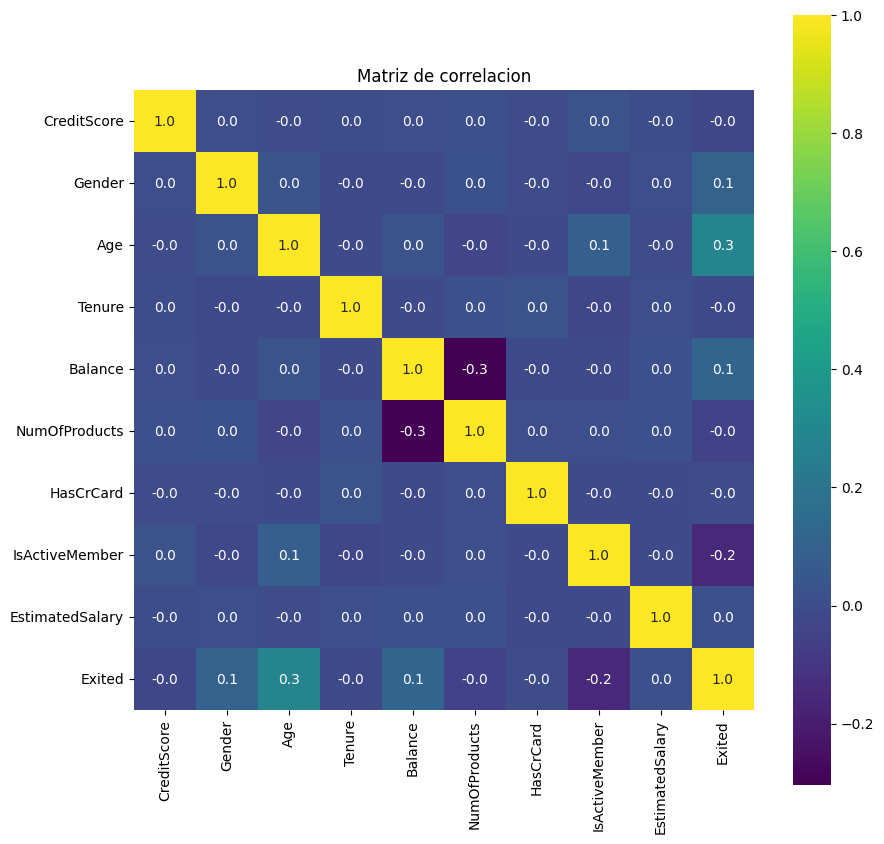

In [79]:
tipo_num = df.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = tipo_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', fmt='.1f', square=True)
plt.title('Matriz de correlacion')
plt.show()

# **Vamos a identificar asimetrias, sesgos o necesidad de normalizacion.Ver si hay valores atipicos o concetraciones extrañas**

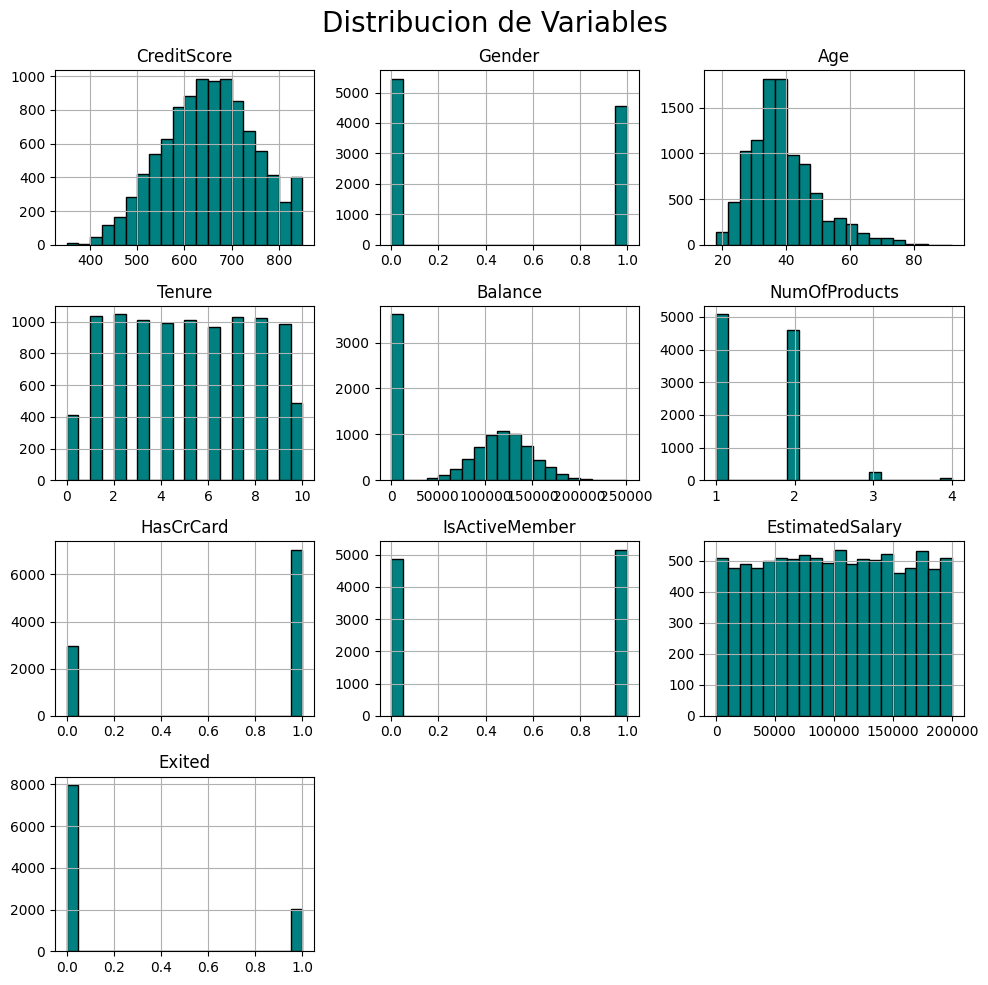

In [80]:
df.hist(bins=20, figsize=(10,10), color='teal', edgecolor='black' )
plt.suptitle('Distribucion de Variables', fontsize=20)
plt.tight_layout()
plt.show()

# **Que combinaciones de variables separan bien la *Salida del cliente*. Si se podrian usar en un modelo lineal, o si se requiere algo mas complejo**

### **Interpretación**

* Si ves que en algunos pares de variables (ej. Age vs Balance) los puntos rojos (Exited=1) y azules (Exited=0) se separan bien, entonces un modelo lineal (como regresión logística) podría funcionar.

* Si, en cambio, están mezclados, entonces probablemente necesites un modelo más complejo (árboles, Random Forest, Gradient Boosting, o redes neuronales) para capturar las relaciones no lineales.





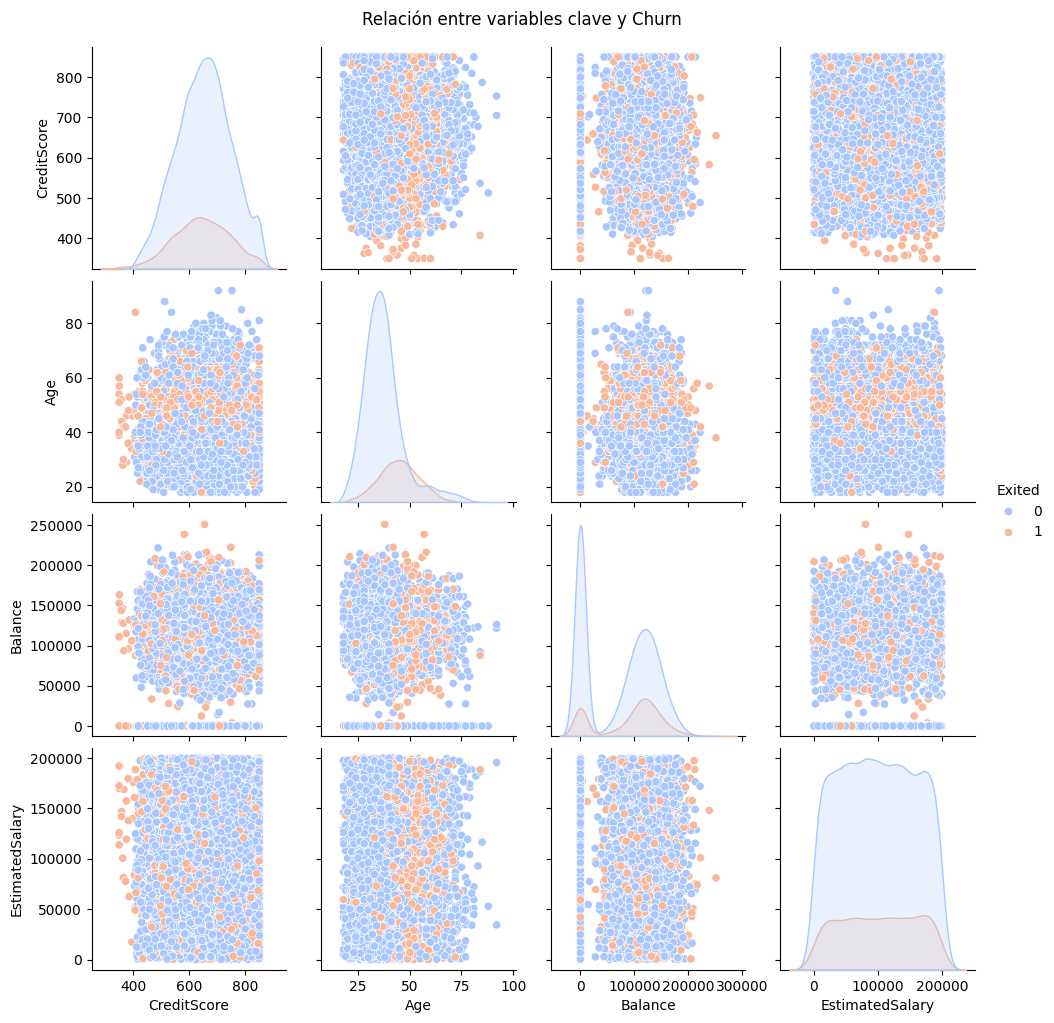

In [81]:
subset = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']]

sns.pairplot(subset, hue='Exited', palette='coolwarm')
plt.suptitle("Relación entre variables clave y Churn", y=1.02)
plt.show()


# **Objetivos del Proyecto - Predicción**

En este proyecto queremos **predecir si un cliente abandonará el banco** **(churn=1) o se mantendrá (churn=0)**, utilizando sus características demográficas y financieras **(edad, género, puntaje crediticio, balance, número de productos, país, etc.)**.

* Evaluamos el rendimiento de diferentes algoritmos **(precisión, recall, F1-score, AUC)**.

* Comparamos modelos simples (como regresión logística) vs modelos más complejos **(árboles de decisión, Random Forest, Gradient Boosting,).**

* Analizamos las **fortalezas y limitaciones** de cada enfoque.

* Justificamos la **elección del mejor modelo para predecir la fuga de clientes y poder usarlo en un entorno de producción.**

# **Modelos que aplicaremos**
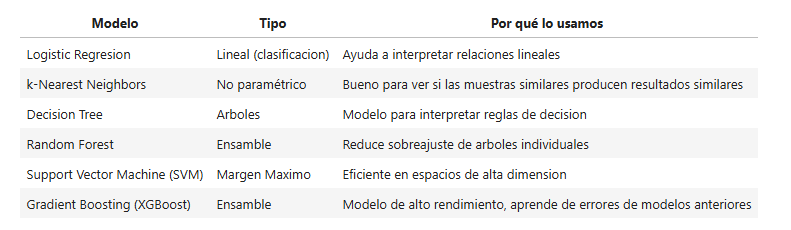

## **Librerias necesarias**

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **Lista de modelos**
Aqui podemos agregar a cada algorimo mas parametros.

In [101]:

modelos = {
 "Logistici Regresion": LogisticRegression(max_iter=10000),
 "KNN": KNeighborsClassifier(n_neighbors=5),
 "Decision Tree": DecisionTreeClassifier(),
 "Random forest": RandomForestClassifier(),
 "SVM": SVC()
}


In [103]:
# Definir X y y correctamente
X = df.drop(['churn_label', 'Exited', 'Geography'], axis=1)
y = df['churn_label']

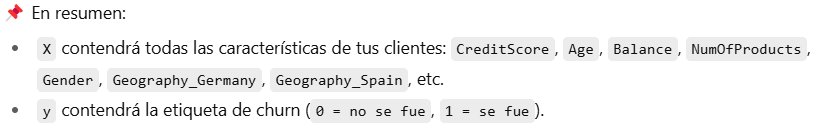

# **Division del modelo**

In [105]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

* X → Características (sin Exited).

* y → Variable objetivo (Exited).

* test_size=0.2 → 20% de los datos para prueba, 80% para entrenamiento.

* random_state=42 → asegura que siempre tengas la misma división (reproducible).


# **Entrenamiento y evaluacion**

In [106]:
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f'\n Modelo: {nombre}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


 Modelo: Logistici Regresion
Accuracy: 0.809
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


 Modelo: KNN
Accuracy: 0.764
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1593
           1       0.26      0.08      0.13       407

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000


 Modelo: Decision Tree
Accuracy: 0.7925
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.51      0.50       407

    accuracy                           0.79      2000
   macro av

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


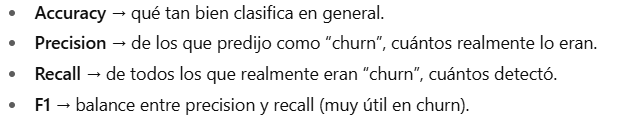

## **Comparacion de precision entre los modelos**

In [116]:
resultados = {}

for nombre, modelo in modelos.items():
    y_pred  = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

## **Mostramos resultados en un grafico**

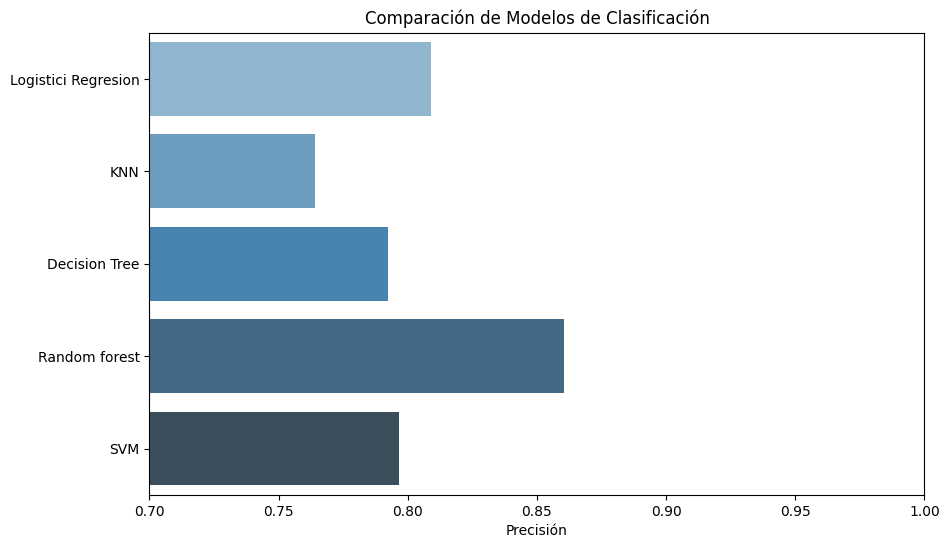

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=list(resultados.values()),
    y=list(resultados.keys()),
    hue=list(resultados.keys()),   # asignar hue nuevas versiones
    palette="Blues_d",
    dodge=False,                   # evitar barras duplicadas
    legend=False                   # ocultar la leyenda
)
plt.xlabel("Precisión")
plt.title("Comparación de Modelos de Clasificación")
plt.xlim(0.7, 1.0)
plt.show()


# **Interpretacion de los resultados**
Resultados comparativos por modelo

| Modelo              | Accuracy | F1 clase 1 | Recall clase 1 | Observación clave                                                                                                   |
| ------------------- | -------- | ---------- | -------------- | ------------------------------------------------------------------------------------------------------------------- |
| Logistic Regression | 0.809    | 0.29       | 0.19           | Aprende algo de la clase minoritaria, pero se queda corto en recall (muchos clientes que sí se van no se detectan). |
| KNN                 | 0.764    | 0.13       | 0.08           | Muy afectado por el desbalance; prácticamente no reconoce a los clientes que se van.                                |
| Decision Tree       | 0.793    | 0.50       | 0.51           | Mejor equilibrio: logra captar a la mitad de los clientes que se van, aunque con menor precisión.                   |
| Random Forest       | 0.861    | 0.57       | 0.46           | Mejor rendimiento global, buen balance entre precisión y recall, pero aún pierde más de la mitad de los churners.   |
| SVM                 | 0.797    | 0.00       | 0.00           | Falló totalmente en la clase minoritaria, solo aprende de los que se quedan.                                        |


# **Que aprendemos**
* Random Forest es el mejor modelo en general, buen accuracy y razonable capacidad para detectar churners (aunque mejora si balanceamos clases).

* Decision Tree sorprende con un recall equilibrado, aunque sacrifica algo de precisión.

* Logistic Regression aprende un poco de la clase minoritaria, pero el recall es bajo.

* KNN y SVM prácticamente no sirven para detectar churn en este dataset tal como está.

# **Vamos a tratar de mejorar los modelos.**

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc,f1_score

In [119]:
# Definir X y y correctamente
X = df.drop(['churn_label', 'Exited', 'Geography'], axis=1)
y = df['churn_label']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [121]:
smote =  SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [122]:
print('Original: ', y_train.value_counts().to_dict())
print('Balanceados:', y_train_sm.value_counts().to_dict())

Original:  {0: 6370, 1: 1630}
Balanceados: {1: 6370, 0: 6370}


# **Vamos a entrenar modelos mejorados**

In [123]:
modelos_mejorados = {
    'LogisticRegression (balanced)': LogisticRegression(class_weight='balanced', max_iter=10000),
    'Random Forest (balanced)': RandomForestClassifier(class_weight='balanced' , max_depth=5, random_state=42),
    'Decision Tree (balanced)': DecisionTreeClassifier(class_weight='balanced', max_depth=5),
    'SVM (balanced)': SVC(class_weight='balanced', max_iter=10000)
}

In [124]:
for nombre, modelos in modelos_mejorados.items():
    modelos.fit(X_train_sm, y_train_sm)
    y_pred = modelos.predict(X_test)

    print(f'Modelos Mejorados {nombre}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Modelos Mejorados LogisticRegression (balanced)
Accuracy: 0.734
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1593
           1       0.39      0.58      0.47       407

    accuracy                           0.73      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.78      0.73      0.75      2000

Modelos Mejorados Random Forest (balanced)
Accuracy: 0.801
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1593
           1       0.51      0.62      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.82      0.80      0.81      2000

Modelos Mejorados Decision Tree (balanced)
Accuracy: 0.8065
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.52      0.67      0.59       407


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Modelos Mejorados SVM (balanced)
Accuracy: 0.4595
              precision    recall  f1-score   support

           0       0.85      0.39      0.53      1593
           1       0.24      0.74      0.36       407

    accuracy                           0.46      2000
   macro avg       0.54      0.56      0.45      2000
weighted avg       0.73      0.46      0.50      2000



# **Matrices de confusión**

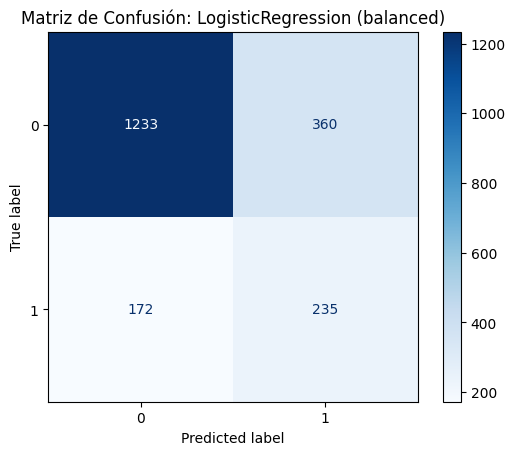

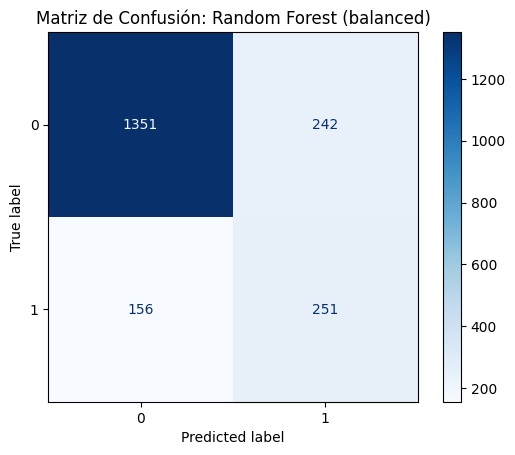

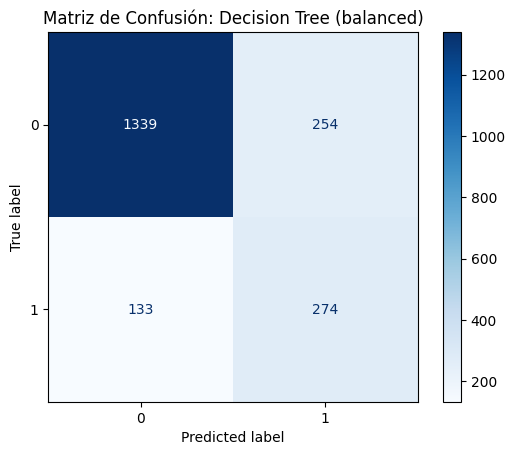

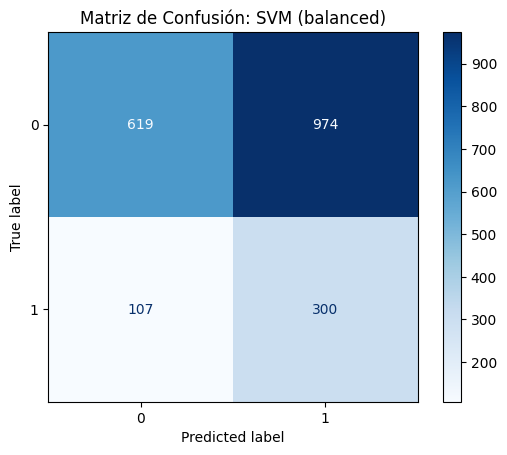

In [125]:
def graficar_confusion(modelos, nombre):
    y_pred = modelos.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelos.classes_ if hasattr(modelos, 'classes_') else [0,1])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.grid(False)
    plt.show()

for nombre, modelos in modelos_mejorados.items():
    graficar_confusion(modelos, nombre)

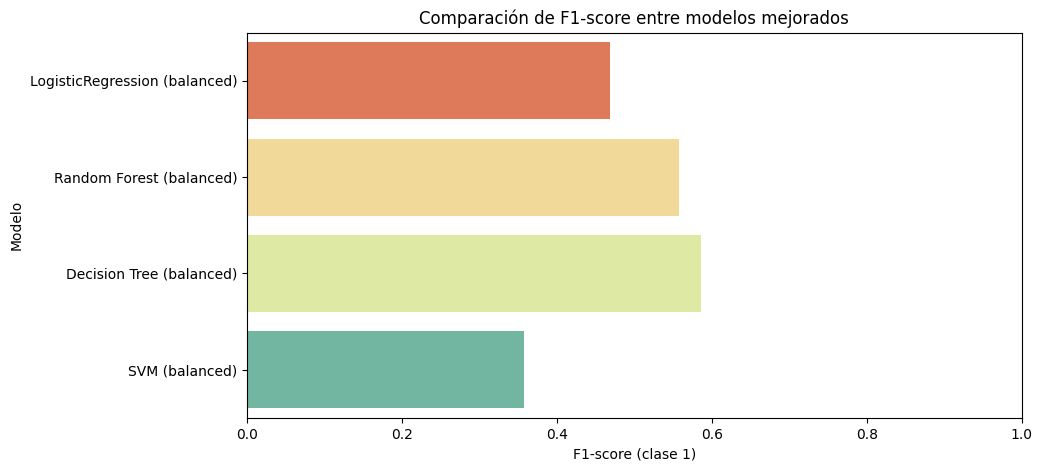

In [127]:
import pandas as pd

df_plot = pd.DataFrame({
    "Modelo": list(f1_scores.keys()),
    "F1-score": list(f1_scores.values())
})

plt.figure(figsize=(10, 5))
sns.barplot(data=df_plot, x="F1-score", y="Modelo", palette="Spectral", hue="Modelo", dodge=False, legend=False)
plt.xlabel("F1-score (clase 1)")
plt.title("Comparación de F1-score entre modelos mejorados")
plt.xlim(0, 1)
plt.show()


# **Evaluación de Modelos Mejorados**

| Modelo              | Accuracy | Recall clase 1 | Precisión clase 1 | F1-Score clase 1 |
| ------------------- | -------- | -------------- | ----------------- | ---------------- |
| Logistic Regression | 0.734    | 0.58           | 0.39              | 0.47             |
| Random Forest       | 0.801    | 0.62           | 0.51              | 0.56             |
| Decision Tree       | 0.807    | 0.67           | 0.52              | 0.59             |
| SVM                 | 0.460    | 0.74           | 0.24              | 0.36             |


# **Interpretación Métrica por Métrica**

| Modelo              | Recall (Antes) | Recall (Balanced) | Precisión (Antes) | Precisión (Balanced) | F1 (Antes) | F1 (Balanced) |
| ------------------- | -------------- | ----------------- | ----------------- | -------------------- | ---------- | ------------- |
| Logistic Regression | **0.19**       | **0.58**          | 0.60              | 0.39                 | 0.29       | 0.47          |
| KNN                 | **0.08**       | –                 | 0.26              | –                    | 0.13       | –             |
| Decision Tree       | **0.51**       | **0.67**          | 0.49              | 0.52                 | 0.50       | 0.59          |
| Random Forest       | **0.46**       | **0.62**          | 0.76              | 0.51                 | 0.57       | 0.56          |
| SVM                 | **0.00**       | **0.74**          | 0.00              | 0.24                 | 0.00       | 0.36          |


# **Conclusion :**

* Logistic Regression: gran salto en recall (0.19 → 0.58), aunque pierde precisión.

* KNN: no se reentrenó con balanced (queda como referencia de lo malo que era en recall = 0.08).

* Decision Tree: mejoró recall (0.51 → 0.67) y también el F1 (0.50 → 0.59).

* Random Forest: recall subió (0.46 → 0.62), precisión bajó, F1 casi igual.

* SVM: pasó de 0 a 0.74 de recall (detecta casi todos los churns), aunque con baja precisión (muchos falsos positivos).